# <center>**Employee Satisfaction Survey Project**</center>

Project Overview:

This project analyzes an Employee Satisfaction Survey dataset to understand factors that influence employee satisfaction and    retention. The analysis focuses on employee demographics, department, salary, work experience, and promotions

## Import Libraries

We start by importing the necessary Python libraries for data handling and visualization.
- `pandas` and `numpy` for data manipulation.
- `seaborn` and `matplotlib` for static visualizations.
- `plotly.express` for interactive dashboards.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set(style='whitegrid')
%matplotlib inline


## Load Dataset

We load the Employee Satisfaction Survey CSV file into a pandas DataFrame and preview the first 5 rows to understand the data structure.


In [5]:
df = pd.read_csv('/kaggle/input/employee-satisfaction-survey-data/Employee Attrition.csv')

## Check Dataset Info

We examine the dataset to check:
- Data types of each column
- Summary statistics for numeric columns
- Missing values in the dataset
This helps identify issues before analysis.


In [6]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

## Data Cleaning

Data cleaning involves:
1. Standardizing column names.
2. Handling missing values:
   - Numeric columns: filled with mean
   - Categorical columns: filled with mode
3. Removing duplicates.
4. Standardizing categorical values for consistency.


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
numeric_cols = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())
categorical_cols = ['dept','salary']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isna().sum())

emp_id                   788
satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
work_accident            788
promotion_last_5years    788
dept                       0
salary                     0
dtype: int64


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['dept'] = df['dept'].str.title()
df['salary'] = df['salary'].str.capitalize()

## Exploratory Data Analysis (EDA)

We explore the dataset using:
- **Categorical analysis:** Department and salary distributions.
- **Numerical analysis:** Satisfaction level distribution and comparisons across groups.
- **Correlation analysis:** Understand relationships between numeric features.


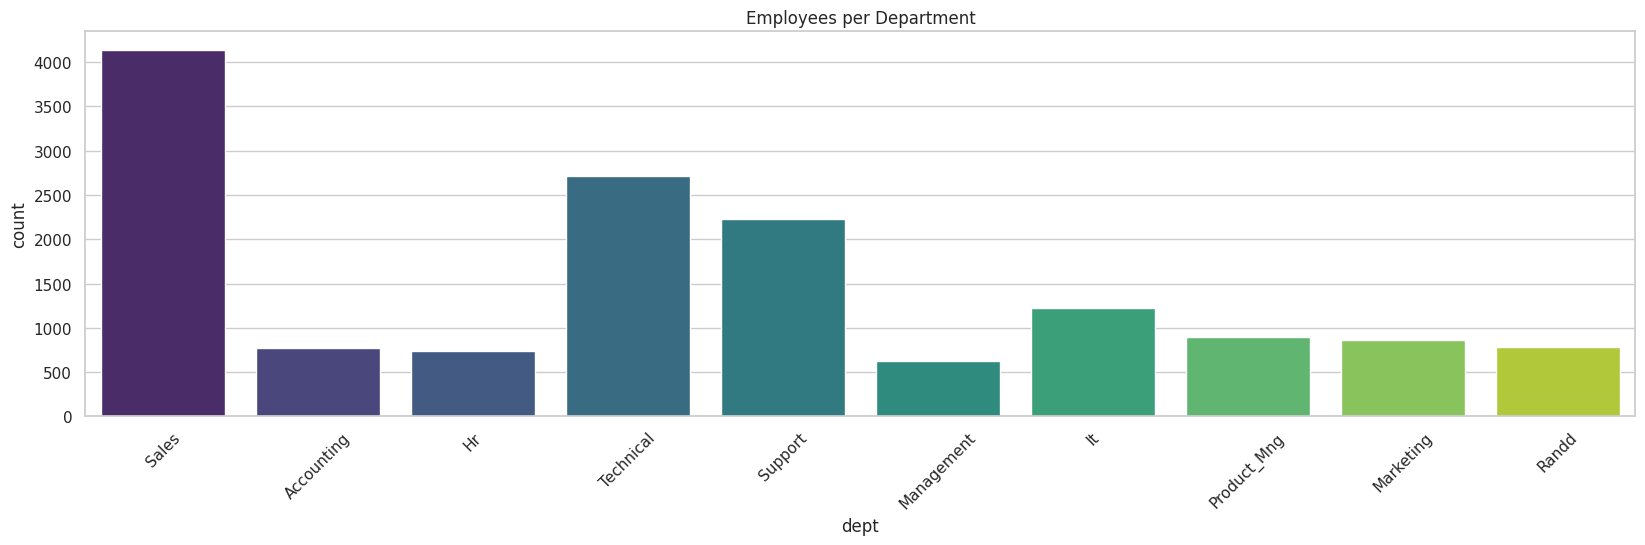

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='dept', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Employees per Department')
plt.show()

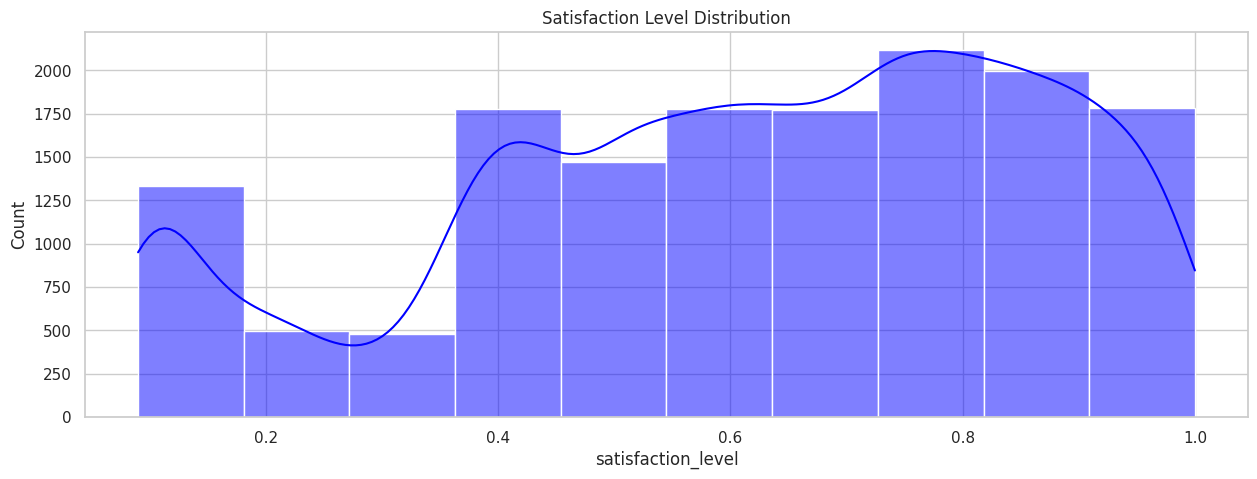

In [25]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(15,5))
sns.histplot(df['satisfaction_level'], bins=10, kde=True, color='blue')
plt.title('Satisfaction Level Distribution')
plt.show()



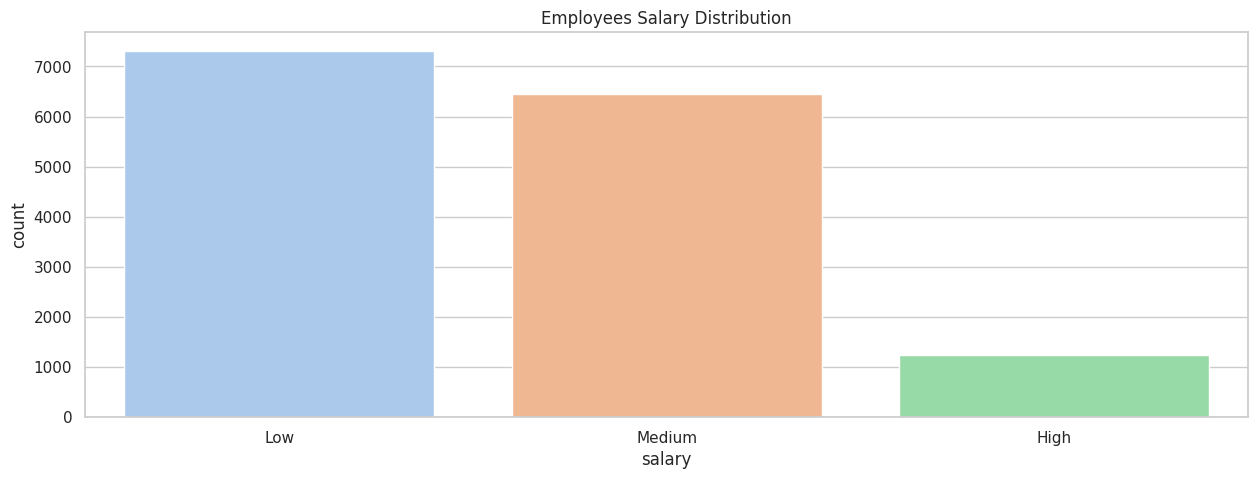

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='salary', data=df, palette='pastel')
plt.title('Employees Salary Distribution')
plt.show()

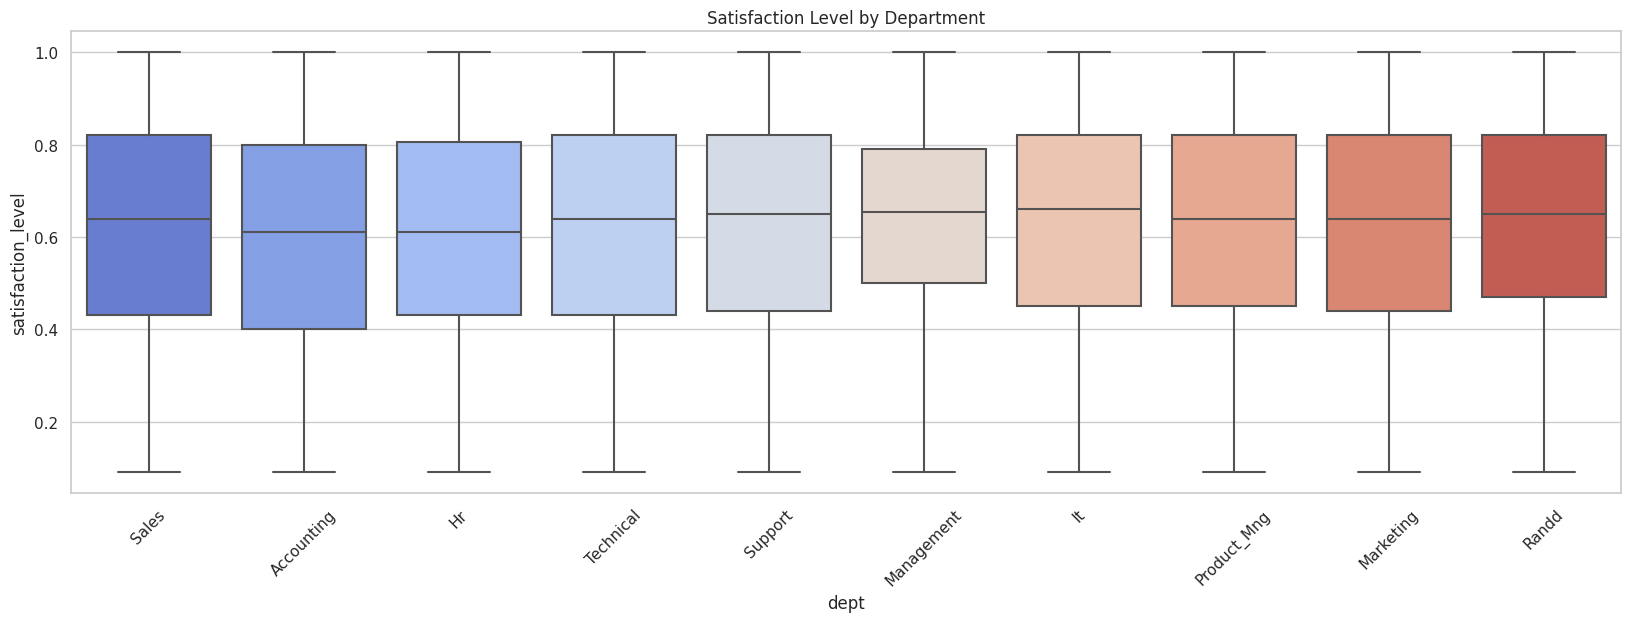

In [40]:
plt.figure(figsize=(20,6))
sns.boxplot(x='dept', y='satisfaction_level', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Satisfaction Level by Department')
plt.show()

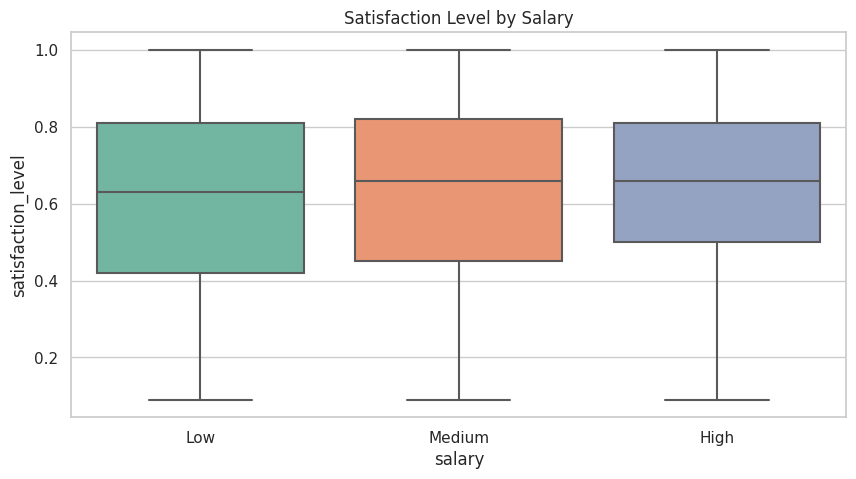

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='salary', y='satisfaction_level', data=df, palette='Set2')
plt.title('Satisfaction Level by Salary')
plt.show()

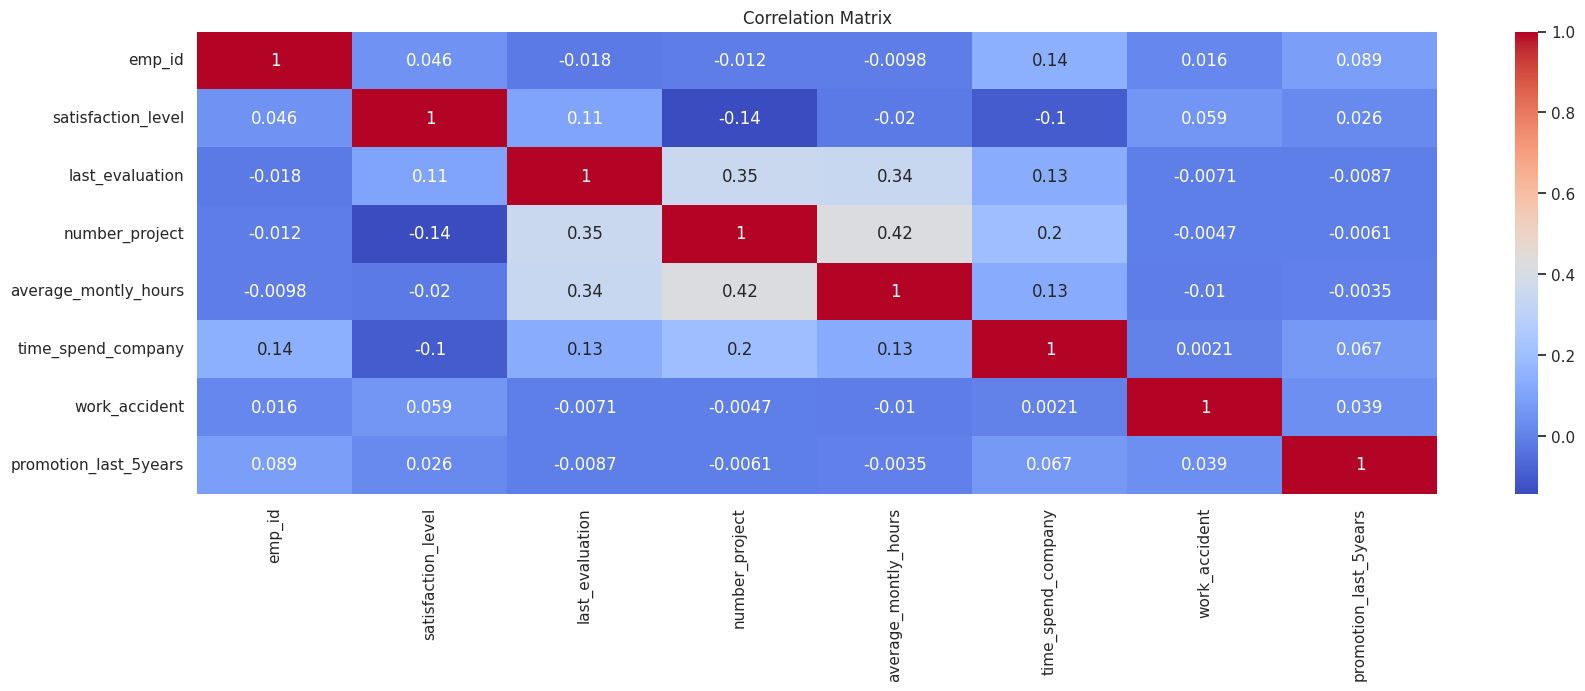

In [37]:
plt.figure(figsize=(20,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Advanced Insights

We extract deeper insights:
1. Average satisfaction by department.
2. Effect of salary on satisfaction.
3. Employees at risk of leaving (low satisfaction < 0.4).
4. Promotion trends across departments.


In [40]:
dept_satisfaction = df.groupby('dept')['satisfaction_level'].mean().sort_values(ascending=False)
dept_satisfaction

dept
management     0.621349
RandD          0.619822
product_mng    0.619634
marketing      0.618601
support        0.618300
IT             0.618142
sales          0.614446
technical      0.607897
hr             0.598809
accounting     0.582151
Name: satisfaction_level, dtype: float64

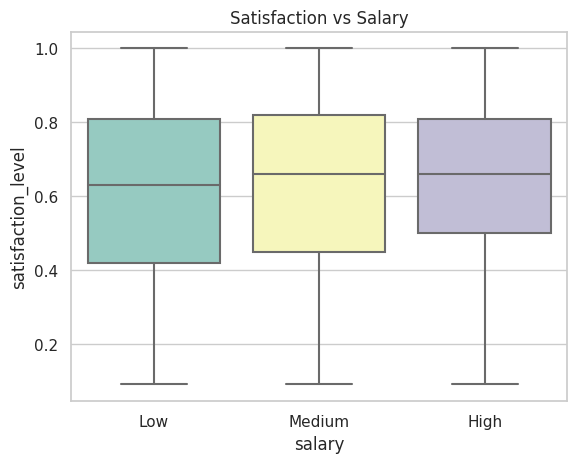

In [27]:
sns.boxplot(x='salary', y='satisfaction_level', data=df, palette='Set3')
plt.title('Satisfaction vs Salary')
plt.show()

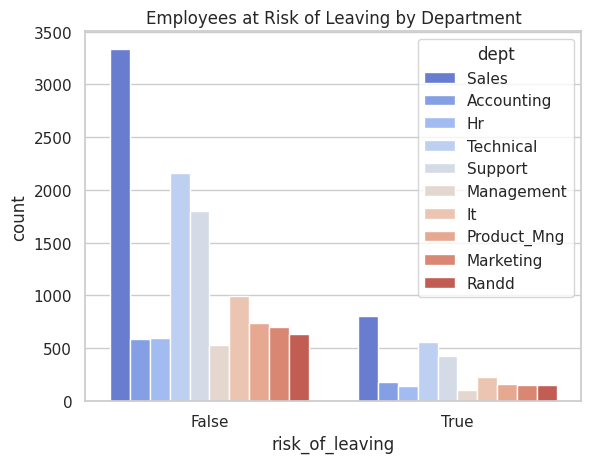

In [28]:
df['risk_of_leaving'] = df['satisfaction_level'] < 0.4
sns.countplot(x='risk_of_leaving', hue='dept', data=df, palette='coolwarm')
plt.title('Employees at Risk of Leaving by Department')
plt.show()

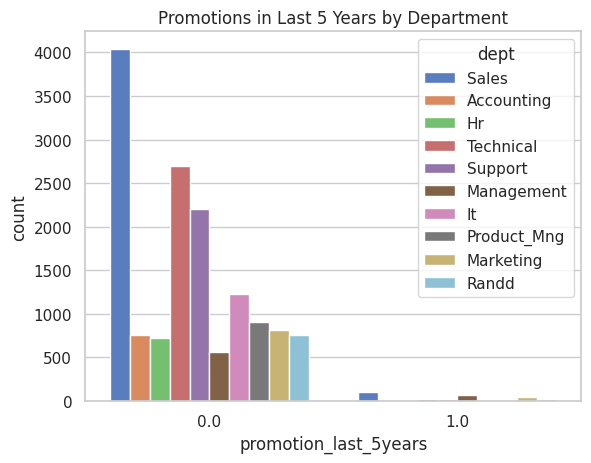

In [29]:
sns.countplot(x='promotion_last_5years', hue='dept', data=df, palette='muted')
plt.title('Promotions in Last 5 Years by Department')
plt.show()

## Interactive Dashboard

We create an interactive Plotly bar chart to visualize satisfaction levels by department and salary. Interactive charts help filter and compare data effectively.


In [22]:
fig = px.bar(df, x='dept', y='satisfaction_level', color='salary', barmode='group', title='Satisfaction Level by Department and Salary')
fig.show()


## Save Cleaned Dataset

The cleaned dataset is saved as `cleaned_employee_survey.csv` for future analysis or sharing.


In [31]:
df.to_csv('cleaned_employee_survey.csv', index=False)


## Project Summary of Insights

Key takeaways from the analysis:
- Departments with highest and lowest satisfaction identified.
- Salary positively impacts satisfaction.
- Employees with low satisfaction are at risk of leaving.
- Promotions are uneven across departments, affecting morale.
- These insights can guide HR strategies to improve retention and work environment.
